In [ ]:
!pip install pmdarima yfinance tensorflow scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.5 MB/s eta 0:00:00


# Importing packages

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the tickers data

In [ ]:
# Download historical financial data for TSLA, BND, and SPY
symbols = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2024-01-01"

data = yf.download(symbols, start=start_date, end=end_date)["Close"]

# Set frequency for the index
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')  # Adjust frequency as needed

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


# Data cleaning and Normalization

In [ ]:
# Data Cleaning and Understanding
print(data.info())  # Check data types and missing values
print(data.describe())  # Basic statistics

# Handling missing values
data = data.interpolate()  # Interpolate missing values

# Normalize data (for machine learning models)
normalized_data = (data - data.min()) / (data.max() - data.min())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3284 entries, 2015-01-02 to 2023-12-29
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BND     3284 non-null   float64
 1   SPY     3284 non-null   float64
 2   TSLA    3284 non-null   float64
dtypes: float64(3)
memory usage: 102.6 KB
None
Ticker          BND          SPY         TSLA
count   3284.000000  3284.000000  3284.000000
mean      68.850194   289.030104   102.780590
std        4.976664    92.540927   110.889598
min       61.676945   156.800873     9.578000
25%       65.172180   207.469070    16.688166
50%       67.069790   263.852091    23.141666
75%       72.730185   383.605540   214.037502
max       78.588921   470.652802   409.970001


# EDA

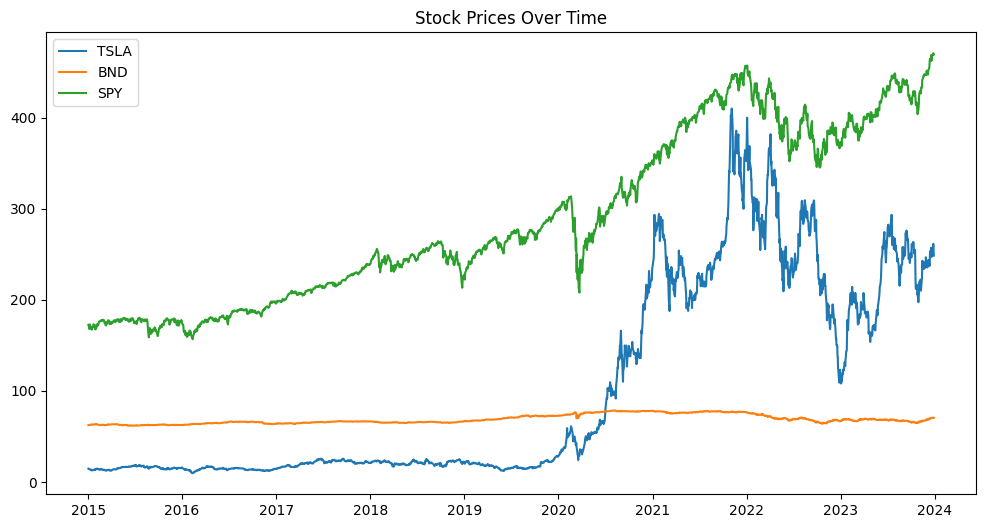

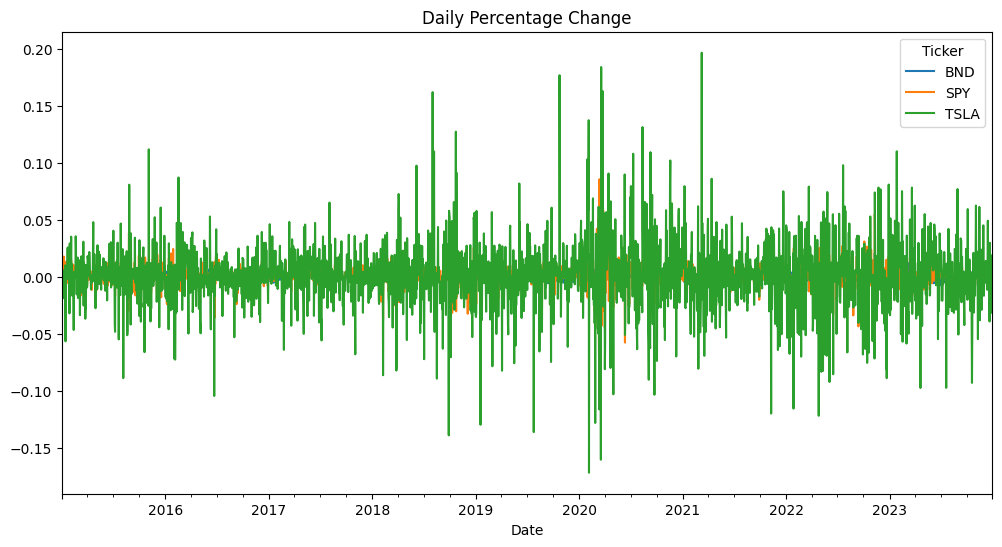

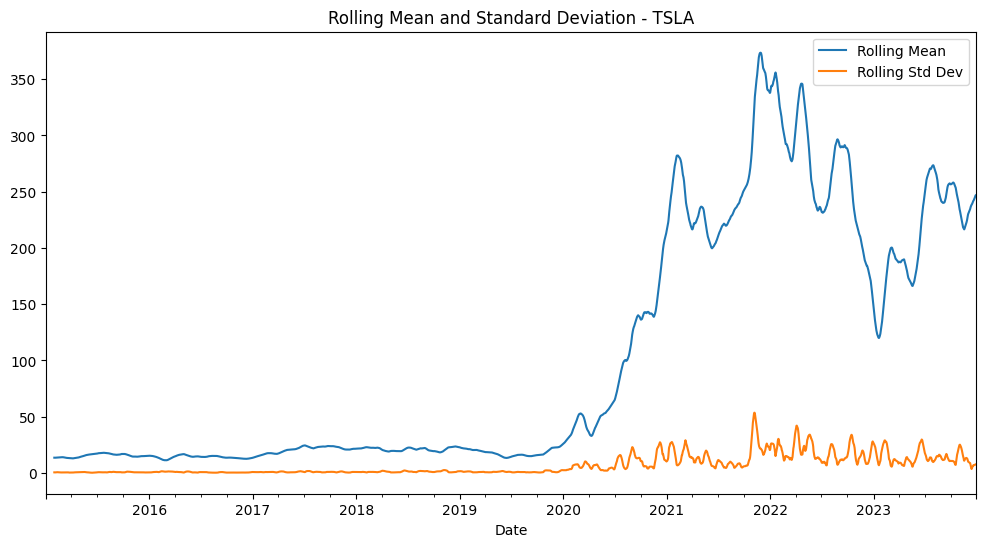

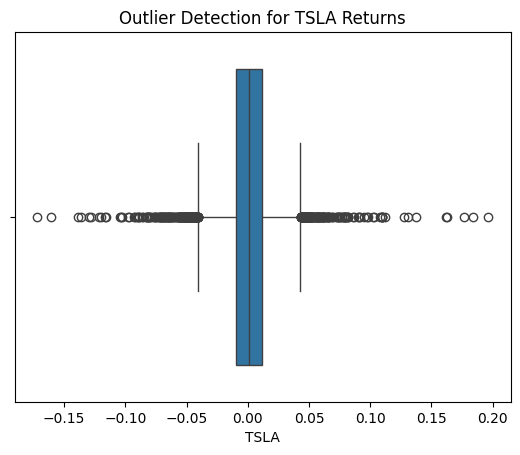

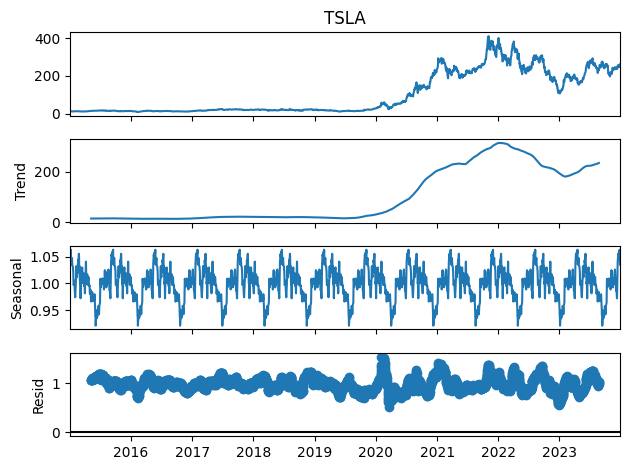

Value at Risk (95% confidence): -0.03918812401326203
Sharpe Ratio: 0.7312240652594186


In [ ]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["TSLA"], label="TSLA")
plt.plot(data.index, data["BND"], label="BND")
plt.plot(data.index, data["SPY"], label="SPY")
plt.legend()
plt.title("Stock Prices Over Time")
plt.show()

# Daily Percentage Change
returns = data.pct_change()
returns.plot(figsize=(12, 6), title="Daily Percentage Change")
plt.show()

# Rolling Mean and Standard Deviation (Volatility Analysis)
rolling_window = 30
data["TSLA"].rolling(rolling_window).mean().plot(label="Rolling Mean", figsize=(12, 6))
data["TSLA"].rolling(rolling_window).std().plot(label="Rolling Std Dev")
plt.legend()
plt.title("Rolling Mean and Standard Deviation - TSLA")
plt.show()

# Outlier Detection
sns.boxplot(x=returns["TSLA"])
plt.title("Outlier Detection for TSLA Returns")
plt.show()

# Seasonal Decomposition
result = seasonal_decompose(data["TSLA"], model="multiplicative", period=252)
result.plot()
plt.show()

# Volatility Metrics
var_95 = np.percentile(returns["TSLA"].dropna(), 5)
sharpe_ratio = (returns["TSLA"].mean() / returns["TSLA"].std()) * np.sqrt(252)
print(f"Value at Risk (95% confidence): {var_95}")
print(f"Sharpe Ratio: {sharpe_ratio}")

# Visualizations Summary:
* Rolling Mean and Standard Deviation: Highlights Tesla's price volatility over time.

* Outlier Detection for Returns: Identifies significant anomalies in TSLA returns.

* Decomposition of Time Series: Illustrates trends, seasonal effects, and residuals.

* Stock Prices Over Time: Compares the performance of TSLA, BND, and SPY.

* Daily Percentage Change: Visualizes volatility across the three stocks.





# Financial Metrics
1. Value at Risk (VaR) at 95% Confidence:
  * VaR: -0.0392 (approximately -3.92%)
  * Interpretation: This indicates that there is a 95% confidence level that the portfolio will not lose more than 3.92% of its value over a specified time period. In other words, in a worst-case scenario, the maximum expected loss is capped at 3.92%.
2. Sharpe Ratio:
  * Sharpe Ratio: 0.7312
  * Interpretation: This ratio measures the risk-adjusted return of the investment. A Sharpe Ratio above 1 is generally considered good, indicating that the return is sufficiently high relative to the risk taken. A value of 0.73 suggests that the investment has a moderate risk-adjusted return, implying that the returns are somewhat favorable relative to the volatility of the asset.


VaR indicates potential loss under normal market conditions, while the Sharpe Ratio assesses how well the return compensates for the risk taken. Together, these metrics provide a quantitative basis for evaluating the risk and performance of the investment.